In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

def plot_size(w, h):
    plt.figure(figsize=(w, h))
    
def create_dataframe(data, column_name):
    return pd.DataFrame(data, columns=column_name)

def concat_df(df1, df2):
    return pd.concat([df1, df2], axis=1)

In [2]:
df = pd.read_csv('boston.csv')
df = df[['CRIM', 'RM']]
df.columns = ['crim', 'rm']

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800


# About terms

**Scale** generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

**Standardize** generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.

**Normalize** can be used to mean either of the above things (and more!).

Ref: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Sheet com algumas opções: https://docs.google.com/spreadsheets/d/1woVi7wq13628HJ-tN6ApaRGVZ85OdmHsDBKLAf5ylaQ/edit#gid=0

## Min Max Scaler

$$\frac{x-min}{max-min}$$

Dimensiona os dados no intervalo [0,1] ou [-1,1] caso tenham valores negativos no conjunto.

No sklearn o existe a possibilidade de estabeler o range;

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

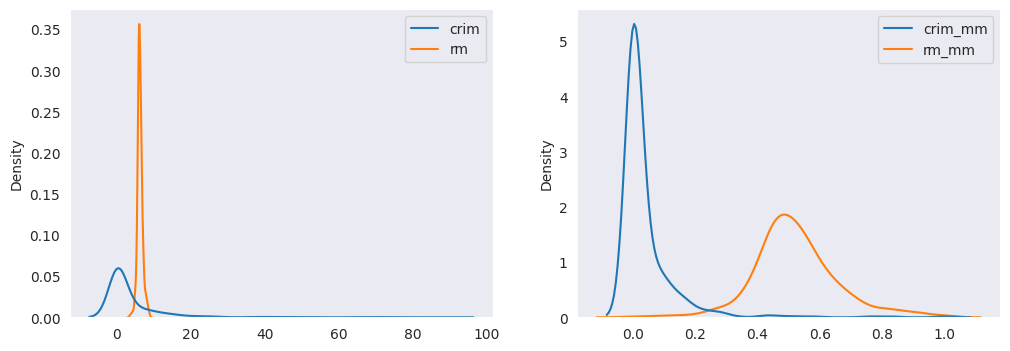

In [4]:
df_mm = df.copy()

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_temp = mm.fit_transform(df_mm)
df_temp = create_dataframe(df_temp, ['crim_mm', 'rm_mm'])
df_mm = concat_df(df_mm, df_temp)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_mm.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_mm.iloc[:, 2:], ax=ax[1])
plt.show()

## Max Abs Scaler

$$\frac{x}{max}$$

Scale each feature by its maximum absolute value.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler

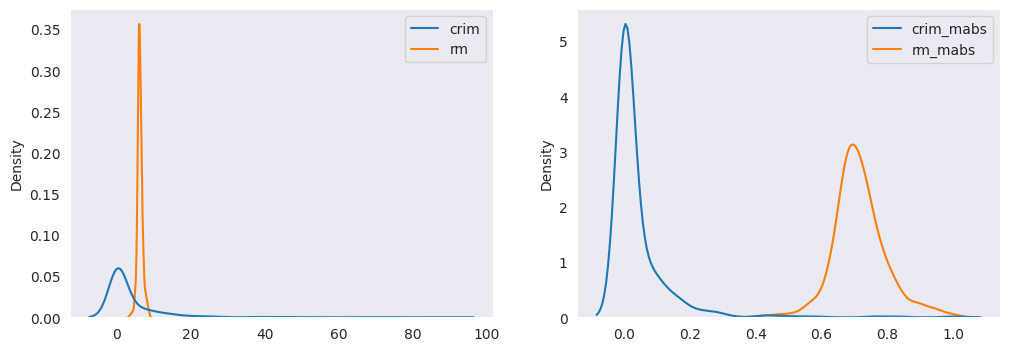

In [5]:
df_mabs = df.copy()

from sklearn.preprocessing import MaxAbsScaler
mabs = MaxAbsScaler()
df_temp = mabs.fit_transform(df_mabs)
df_temp = create_dataframe(df_temp, ['crim_mabs', 'rm_mabs'])
df_mabs = concat_df(df_mabs, df_temp)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_mabs.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_mabs.iloc[:, 2:], ax=ax[1])
plt.show()

## Standart Scaler

$$z = \frac{x-\mu}{s}$$

Standard Scaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Results in a distribution with a standard deviation equal and variance is equal to 1 also, because variance = standard deviation squared. Makes the mean of distribuition approximately 0.

Segue a distribuição normal padrão.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

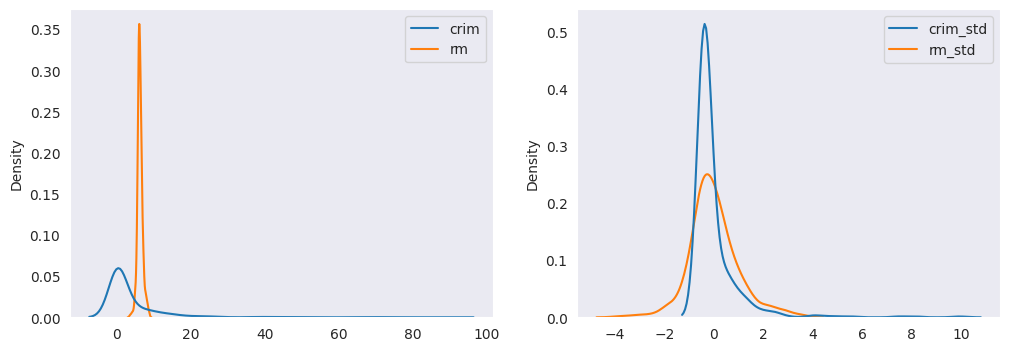

In [6]:
df_std = df.copy()

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_temp = std.fit_transform(df_std)
df_temp = create_dataframe(df_temp, ['crim_std', 'rm_std'])
df_std = concat_df(df_std, df_temp)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_std.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_std.iloc[:, 2:], ax=ax[1])
plt.show()

In [7]:
desc = df_std.describe().T
desc['var'] = np.var(df_std)
desc

,count,mean,std,min,25%,50%,75%,max,var
crim,506.0,3.613524e+00,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200,73.840360
rm,506.0,6.284634e+00,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000,0.492695
crim_std,506.0,-1.123388e-16,1.000990,-0.419782,-0.410970,-0.390667,0.007397,9.933931,1.000000
rm_std,506.0,-1.088282e-16,1.000990,-3.880249,-0.568630,-0.108466,0.482768,3.555044,1.000000


## Robust Scaler

$$\frac{x-\mu}{IQR}$$

Where IQR = 3º quartil - 1º quartil

Robust Scaler does not scale the data into a predetermined interval like MinMaxScaler.

Reduce the effects of outliers.

Outros: https://proclusacademy.com/blog/robust-scaler-outliers/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

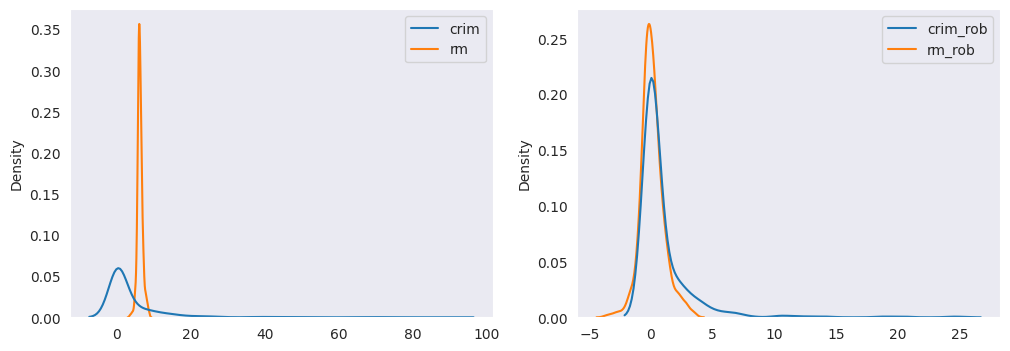

In [8]:
df_rob = df.copy()

from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
df_temp = rob.fit_transform(df_rob)
df_temp = create_dataframe(df_temp, ['crim_rob', 'rm_rob'])
df_rob = concat_df(df_rob, df_temp)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_rob.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_rob.iloc[:, 2:], ax=ax[1])
plt.show()

## Power Transformer

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

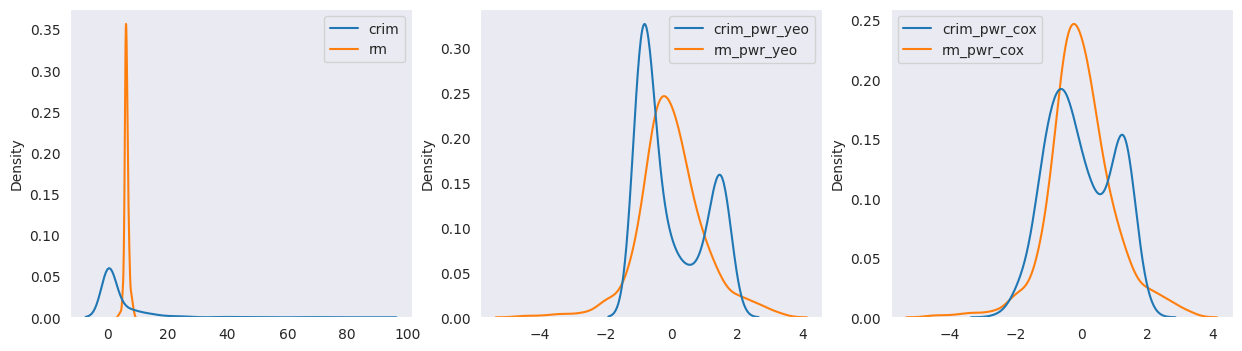

In [9]:
df_pwr = df.copy()

from sklearn.preprocessing import PowerTransformer
pwr_yeo = PowerTransformer(method='yeo-johnson')
df_temp = pwr_yeo.fit_transform(df_pwr)
df_temp = create_dataframe(df_temp, ['crim_pwr_yeo', 'rm_pwr_yeo'])
df_pwr = concat_df(df_pwr, df_temp)

pwr_cox = PowerTransformer(method='box-cox')
df_temp = pwr_cox.fit_transform(df_pwr.iloc[:, 0:2])
df_temp = create_dataframe(df_temp, ['crim_pwr_cox', 'rm_pwr_cox'])
df_pwr = concat_df(df_pwr, df_temp)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.kdeplot(df_pwr.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_pwr.iloc[:, 2:4], ax=ax[1])
sns.kdeplot(df_pwr.iloc[:, 4:], ax=ax[2])
plt.show()

## Quantile Transformer

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer

**Obs:** O valor usado para n_samples faz diferença no resultado da distribuição. 

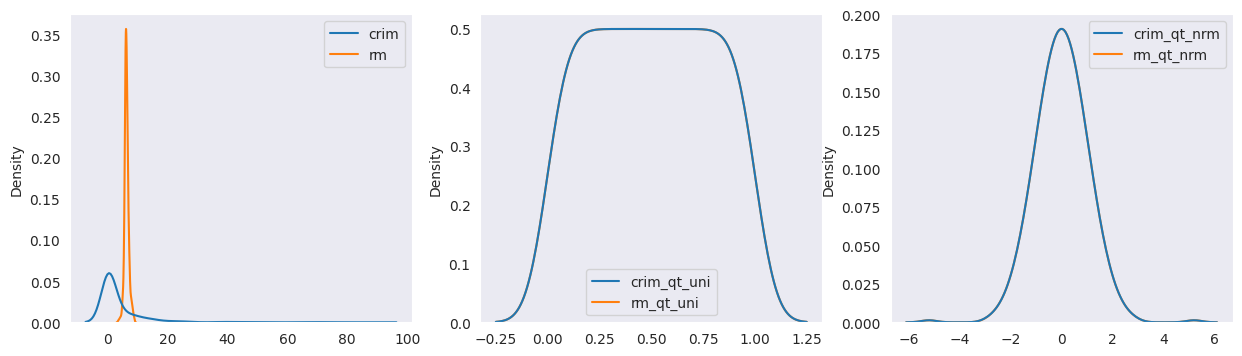

In [10]:
df_qt = df.copy()
n_samples = df_qt.shape[0]

from sklearn.preprocessing import QuantileTransformer
qt_uni = QuantileTransformer(n_quantiles=n_samples, output_distribution='uniform')
df_temp = qt_uni.fit_transform(df_qt)
df_temp = create_dataframe(df_temp, ['crim_qt_uni', 'rm_qt_uni'])
df_qt = concat_df(df_qt, df_temp)

qt_nrm = QuantileTransformer(n_quantiles=n_samples, output_distribution='normal')
df_temp = qt_nrm.fit_transform(df_qt.iloc[:, 0:2])
df_temp = create_dataframe(df_temp, ['crim_qt_nrm', 'rm_qt_nrm'])
df_qt = concat_df(df_qt, df_temp)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.kdeplot(df_qt.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_qt.iloc[:, 2:4], ax=ax[1])
sns.kdeplot(df_qt.iloc[:, 4:], ax=ax[2])
plt.show()

## Normalizer

Works on the rows, not the columns! 

The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples. It can be seen on both figures below where all samples are mapped onto the unit circle.

By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1.

**l1:** $z=||x||_1=\sum_{i=1}^{n}|x_i|$

**l2:** $z=||x||_2=\sqrt{\sum_{i=1}^{n}|x_i^2|}$

**max:** $z=||x||_\infty=max|x_i|$

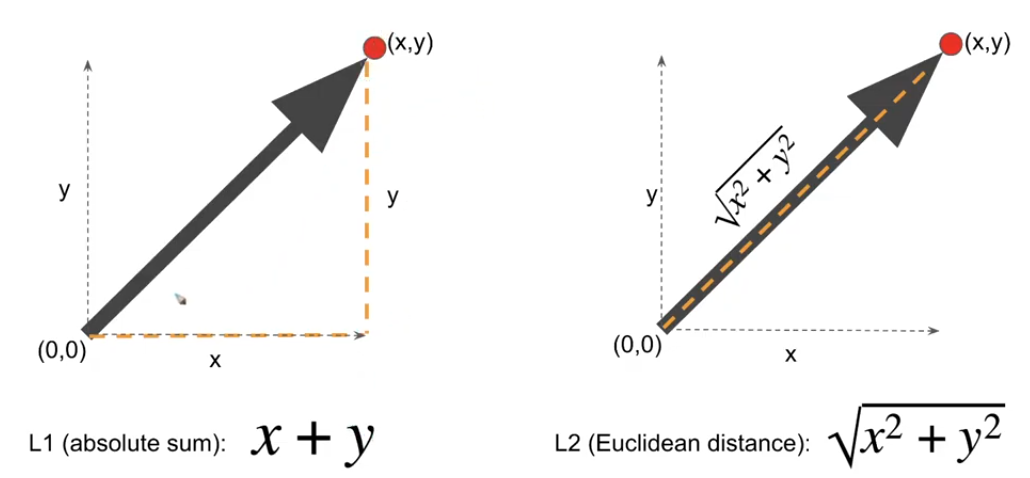

Vídeo: https://www.youtube.com/watch?v=bx7FqwVfTkg

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

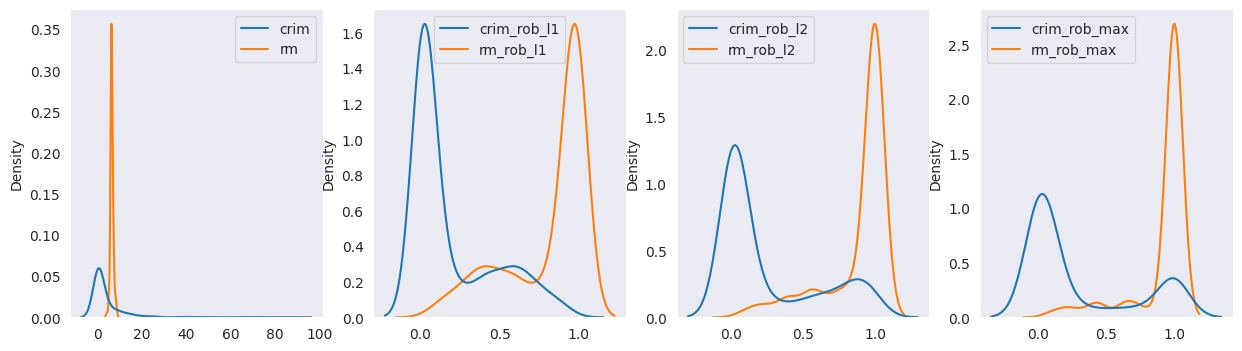

In [11]:
df_norm = df.copy()

from sklearn.preprocessing import Normalizer
norm_l1 = Normalizer(norm='l1')
df_temp_l1 = norm_l1.fit_transform(df_norm)
df_temp_l1 = create_dataframe(df_temp_l1, ['crim_rob_l1', 'rm_rob_l1'])
df_norm = concat_df(df_norm, df_temp_l1)

norm_l2 = Normalizer(norm='l2')
df_temp_l2 = norm_l2.fit_transform(df_norm.iloc[:, 0:2])
df_temp_l2 = create_dataframe(df_temp_l2, ['crim_rob_l2', 'rm_rob_l2'])
df_norm = concat_df(df_norm, df_temp_l2)

norm_mx = Normalizer(norm='max')
df_temp_mx = norm_mx.fit_transform(df_norm.iloc[:, 0:2])
df_temp_mx = create_dataframe(df_temp_mx, ['crim_rob_max', 'rm_rob_max'])
df_norm = concat_df(df_norm, df_temp_mx)

fig, ax = plt.subplots(1, 4, figsize=(15, 4))
sns.kdeplot(df_norm.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_norm.iloc[:, 2:4], ax=ax[1])
sns.kdeplot(df_norm.iloc[:, 4:6], ax=ax[2])
sns.kdeplot(df_norm.iloc[:, 6:], ax=ax[3])
plt.show()

# Log Scaling

$$x=log(x)$$

Log scaling computes the log of your values to compress a wide range to a narrow range.

Log scaling is helpful when a handful of your values have many points, while most other values have few points. This data distribution is known as the power law distribution.

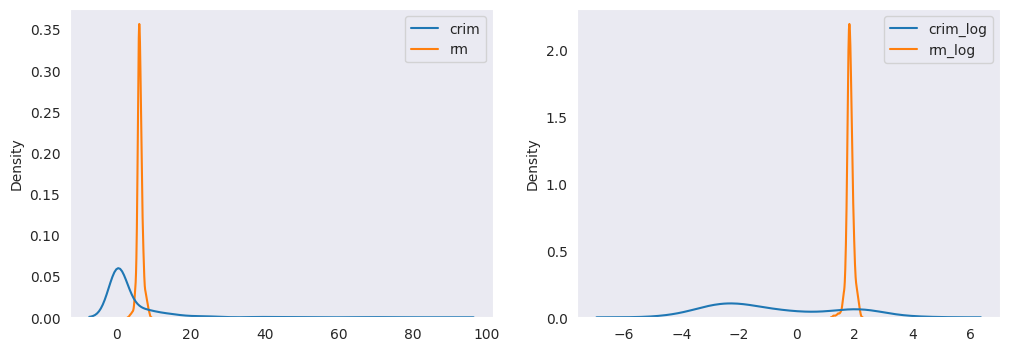

In [12]:
df_log = df.copy()

df_log['crim_log'] = np.log(df_log['crim'])
df_log['rm_log'] = np.log(df_log['rm'])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_log.iloc[:, 0:2], ax=ax[0])
sns.kdeplot(df_log.iloc[:, 2:], ax=ax[1])
plt.show()

# Tips

* Use StandardScaler if you want each feature to have zero-mean, unit standard-deviation. 
* If you want more normally distributed data, and are okay with transforming your data, check out scikit-learn’s QuantileTransformer(output_distribution='normal').
* Use MinMaxScaler if you want to have a light touch. It’s non-distorting.
* You could use RobustScaler if you have outliers and want to reduce their influence.
* Use Normalizer sparingly — it normalizes sample rows, not feature columns. It can use l2 or l1 normalization.